<a href="https://colab.research.google.com/github/Nohyunjin/DeepLearning/blob/main/%EC%9D%B4%EB%AF%B8%EC%A7%80_%ED%9E%88%EC%8A%A4%ED%86%A0%EA%B7%B8%EB%9E%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np

def histogram(img):
    height, width = img.shape
    hist = np.zeros(256)
    for y in range(height):
        for x in range(width):
            hist[img[y,x]] = hist[img[y,x]] + 1
    return hist

def equalization(img):
    height, width = img.shape
    img_in = img.copy()
    img_out = np.zeros(img_in.shape, dtype = np.uint8)
    histogram = np.zeros(256, dtype = int)
    sum_histo = np.zeros(256, dtype = int)

    for y in range(height):
        for x in range(width):
            histogram[img_in[y,x]] = histogram[img_in[y,x]] + 1

    sum = 0
    scale_factor = 255 / (width * height)
    for i in range(256):
        sum += histogram[i]
        sum_histo[i] = np.ceil(sum*scale_factor)

    for y in range(height):
        for x in range(width):
            img_out[y,x] = sum_histo[img_in[y][x]]

    return img_out

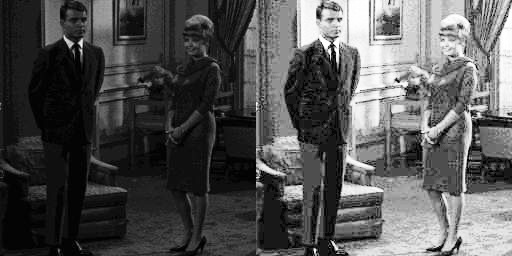

In [8]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("couple2.jpg", cv2.IMREAD_GRAYSCALE)
img2 = equalization(img)
cv2_imshow(np.c_[img, img2])


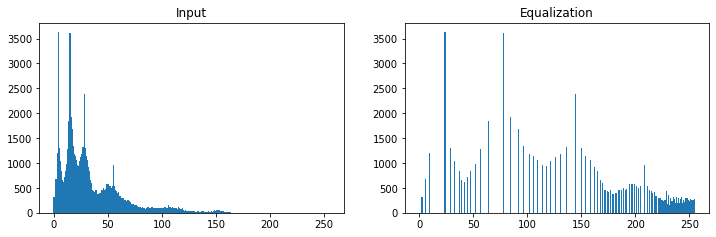

In [11]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread("couple2.jpg", cv2.IMREAD_GRAYSCALE)
img2 = equalization(img)

plt.figure(figsize = (12, 3.5))
plt.subplot(121)
plt.bar(x = range(256), height = histogram(img), width = 1)
plt.title("Input")
plt.subplot(122)
plt.bar(x = range(256), height = histogram(img2), width = 1)
plt.title("Equalization")
plt.show()


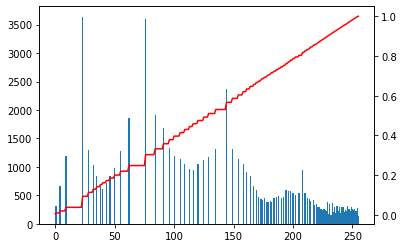

In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("couple2.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.equalizeHist(img)

hist = histogram(img2)

cumsum_hist = np.cumsum(hist)
sum_hist = np.sum(hist)
plt.bar(range(256), hist, width = 1)
ax = plt.twinx()
ax.plot(range(256), cumsum_hist/sum_hist, 'r')
plt.show()

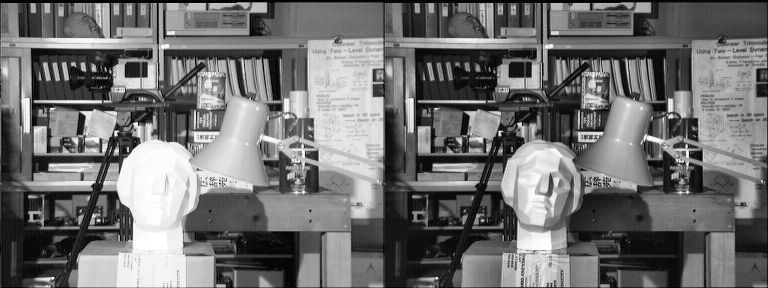

In [20]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("tsukuba.png", cv2.IMREAD_GRAYSCALE)

img2 = cv2.equalizeHist(img)
clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize = (8,8))
img3 = clahe.apply(img)

cv2_imshow(np.c_[img2, img3])

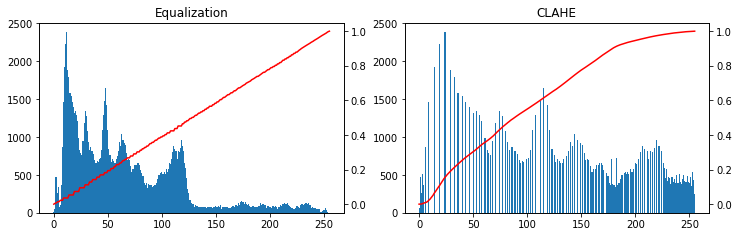

In [22]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("tsukuba.png", cv2.IMREAD_GRAYSCALE)

img2 = cv2.equalizeHist(img)
clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize = (8,8))
img3 = clahe.apply(img)

hist1 = histogram(img2)
cumsum_hist1 = np.cumsum(hist1)
sum_hist1 = np.sum(hist1)

hist2 = histogram(img3)
cumsum_hist2 = np.cumsum(hist2)
sum_hist2 = np.sum(hist2)

plt.figure(figsize = (12, 3.5))
plt.subplot(121)
plt.bar(x = range(256), height = histogram(img), width = 1)
ax = plt.twinx()
ax.plot(range(256), cumsum_hist1/sum_hist1, 'r')
plt.title("Equalization")

plt.subplot(122)
plt.bar(x = range(256), height = histogram(img2), width = 1)
ax = plt.twinx()
ax.plot(range(256), cumsum_hist2/sum_hist2, "r")
plt.title("CLAHE")
plt.show()